# DBSCAN
Density-based Spatial Clustering *of* Applications *with* Noise 

In [255]:
import numpy as np
import matplotlib.pyplot as plt

class DBSCAN:
    
    # Params
    r = 1
    min_sample = 3
    
    # Constructor
    def __init__(self, r = 1, min_sample = 3):
        self.r = r
        self.min_sample = min_sample
      

    
    # Generate moon-shaped data
    def generate_moon(self, centerX, centerY, face, N):
        dir = self.set_moon_direction(face)
        
        lower_μ = [centerX + (dir * 1), centerY + (-3)]
        center_μ = [centerX, centerY]
        upper_μ = [centerX + (dir * 1), centerY + 3]
        
        lower_cov = [[1, dir * (-0.65)], [dir * (-0.65), 1]]
        center_cov = [[0.1, 0], [0, 2]]
        upper_cov = [[1, (dir * 0.65)], [dir * (0.65), 1]]
        
        return np.concatenate([
            np.random.multivariate_normal(lower_μ, lower_cov, int(round(N/3,0))),
            np.random.multivariate_normal(center_μ, center_cov, int(round(N/3,0))),
            np.random.multivariate_normal(upper_μ, upper_cov, int(round(N/3,0))),
        ])
    
    # Moon direction setter
    def set_moon_direction(self, face):
        if face == 'right':
            return 1
        elif face == 'left':
            return -1

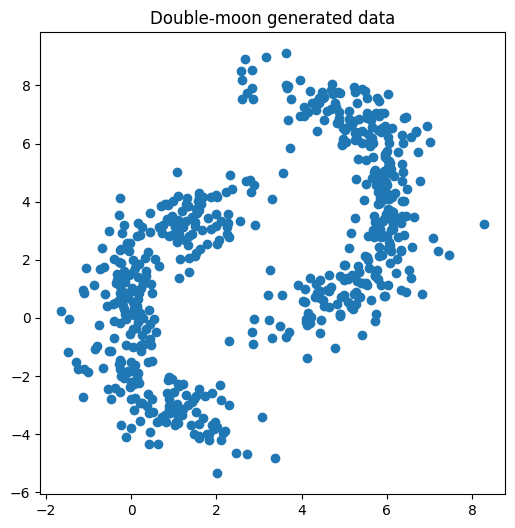

In [285]:
dbscan = DBSCAN()
right_moon = dbscan.generate_moon(0,0,'right',300)
left_moon = dbscan.generate_moon(6,4,'left',300)
data = np.concatenate([right_moon, left_moon])

fig = plt.figure(figsize=(6,6))
plt.title('Double-moon generated data')
plt.scatter(data[:,0], data[:,1])
plt.gca().set_aspect('auto')

## Data generation

(0.0, 10.0)

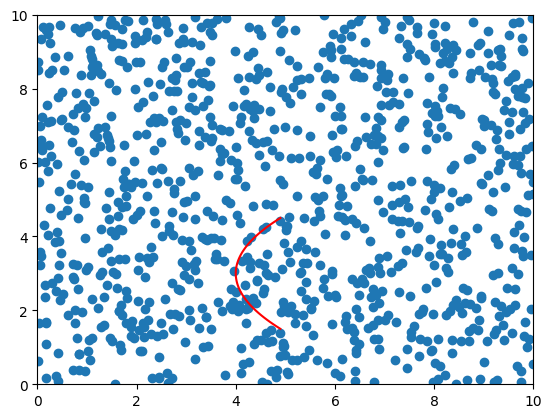

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Parabola function
def parabola(X, w, b):
    return w * X ** 2 + b

# Generate data
x_1 = np.random.uniform(0, 10, [1000, 1000])
x_2 = np.linspace(-1.5,1.5,50)

X = np.concatenate([x_1])

plt.scatter(X[:,0], X[:,1])
plt.plot(parabola(x_2,0.4,4),x_2 + 3,c='red')
plt.xlim(0,10)
plt.ylim(0,10)